In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install cartopy
!pip install splot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 23.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import cartopy.crs as ccrs
import geopandas as gpd
import libpysal
from libpysal.weights import Queen, Rook, KNN
from esda import Moran
import matplotlib.pyplot as plt
import seaborn as sns
from splot.esda import moran_scatterplot
from esda.moran import Moran
import numpy as np
from splot.esda import plot_moran_simulation
from splot.esda import lisa_cluster

# Part 1. Data Selection and Attributes (County-Level)

In [ ]:
county = gpd.read_file("Census_County_TIGER00_IN.shp")
county.head()

,AREA,PERIMETER,NAME_U,NAME_L,NCAPC,CNTY_FIPS,STFID,POP2000,WHITE,BLACK,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,8.352031e+08,116410.31836,STEUBEN,Steuben,76,151,18151,33214,32281,123,...,4208,375,715,8911,3.00,17337,4599,9951,2787,"POLYGON ((679527.291 4625396.026, 681172.04 46..."
1,1.001560e+09,129036.36824,LAGRANGE,Lagrange,44,087,18087,34909,33770,66,...,3777,249,434,8856,3.54,12938,1713,9151,2074,"POLYGON ((648336.954 4624638.241, 649912.369 4..."
2,1.211453e+09,139308.15005,ELKHART,Elkhart,20,039,18039,182791,157931,9551,...,19981,1839,4636,47659,3.18,69791,3637,47769,18385,"POLYGON ((609782.908 4623876.537, 611399.543 4..."
3,1.194457e+09,155508.91992,ST JOSEPH,St Joseph,71,141,18141,265559,218706,30422,...,28122,2148,7865,66802,3.07,107013,6270,72194,28549,"POLYGON ((576360.816 4623609.402, 577920.195 4..."
4,1.620569e+09,177807.09411,LAKE,Lake,45,089,18089,484564,323290,122723,...,49444,3671,16887,127036,3.19,194992,13359,125249,56384,"POLYGON ((458433.478 4623270.678, 481438.856 4..."


In [ ]:
county.columns

Index(['AREA', 'PERIMETER', 'NAME_U', 'NAME_L', 'NCAPC', 'CNTY_FIPS', 'STFID',
       'POP2000', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER',
       'MULT_RACE', 'HISPANIC', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17',
       'AGE_18_21', 'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64',
       'AGE_65_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS',
       'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
       'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'geometry'],
      dtype='object')

In [ ]:
attributes = county[['POP2000', 'MED_AGE', 'ASIAN']]
display(attributes)

,POP2000,MED_AGE,ASIAN
0,33214,35.5,133
1,34909,29.5,92
2,182791,33.0,1681
3,265559,34.4,3557
4,484564,35.9,3983
...,...,...,...
87,18899,38.0,22
88,52383,37.3,330
89,27061,37.4,42
90,20391,37.3,39


In [ ]:
# change projection to WGS4
county = county.to_crs(epsg=4326)

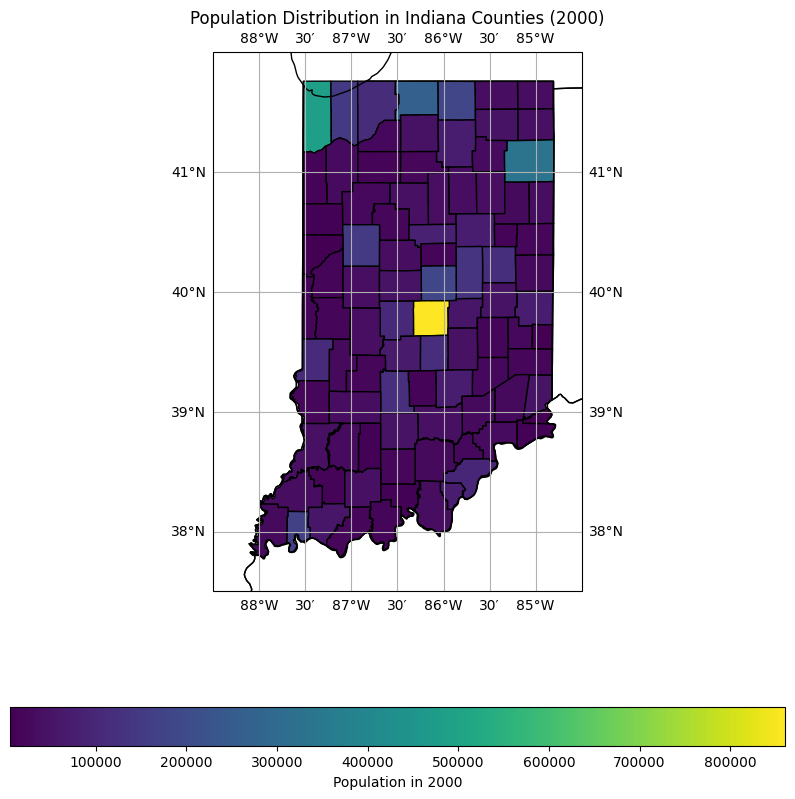

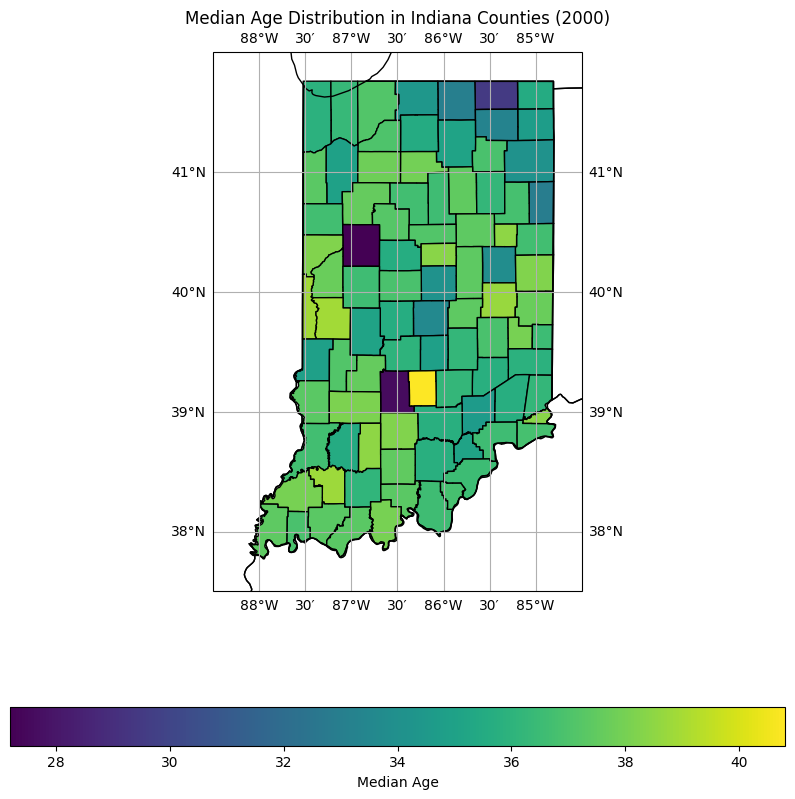

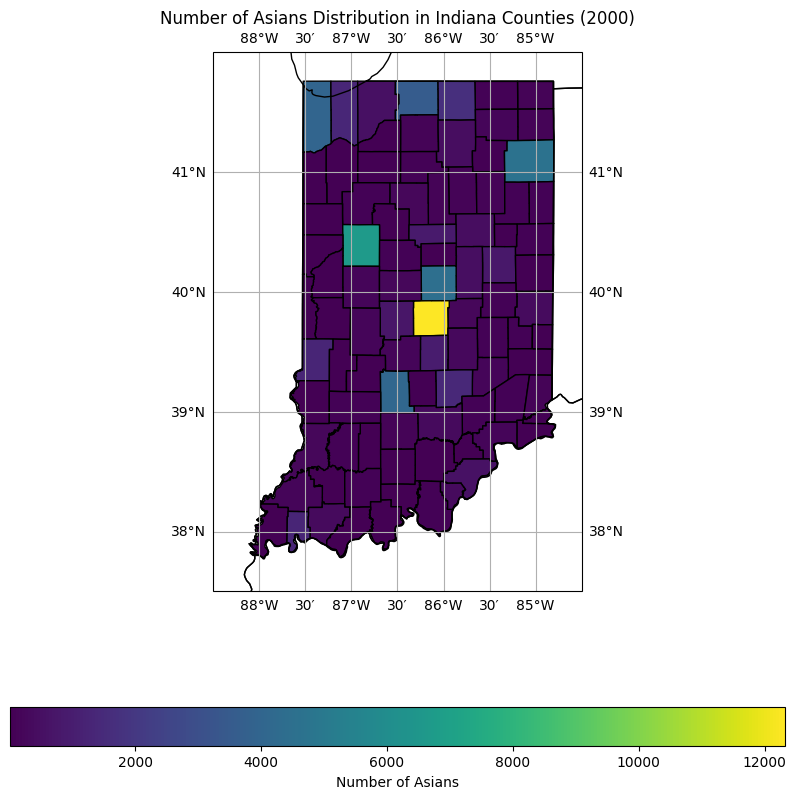

In [ ]:
# Plot for POP2000
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
county.plot(column='POP2000', ax=ax, legend=True,
                  legend_kwds={'label': "Population in 2000",
                               'orientation': "horizontal"},
                  edgecolor='black')
ax.set_extent([-88.5, -84.5, 37.5, 42], crs=ccrs.Geodetic())
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(ccrs.cartopy.feature.STATES)
ax.set_title('Population Distribution in Indiana Counties (2000)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

# Plot for MED_AGE
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
county.plot(column='MED_AGE', ax=ax, legend=True,
                  legend_kwds={'label': "Median Age",
                               'orientation': "horizontal"},
                  edgecolor='black')
ax.set_extent([-88.5, -84.5, 37.5, 42], crs=ccrs.Geodetic())
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(ccrs.cartopy.feature.STATES)
ax.set_title('Median Age Distribution in Indiana Counties (2000)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

# Plot for ASIANS
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
county.plot(column='ASIAN', ax=ax, legend=True,
                  legend_kwds={'label': "Number of Asians",
                               'orientation': "horizontal"},
                  edgecolor='black')
ax.set_extent([-88.5, -84.5, 37.5, 42], crs=ccrs.Geodetic())
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(ccrs.cartopy.feature.STATES)
ax.set_title('Number of Asians Distribution in Indiana Counties (2000)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

# Part 2. Spatial Connectivity Evalutation

### 1. Plot the connection of counties under two different neighborhood definitions


In [ ]:
from libpysal.weights import Queen, Rook

wq = Queen.from_dataframe(county)
wr = Rook.from_dataframe(county)

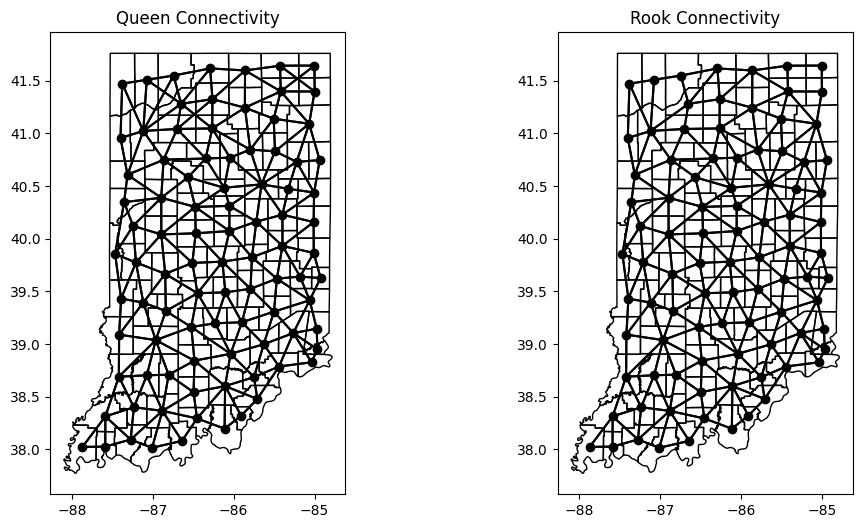

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Queen connectivity
county.plot(ax=axes[0], edgecolor='black', facecolor='none') # Add county shapefile as background
wq.plot(county, ax=axes[0])
axes[0].set_title('Queen Connectivity')

# Plot for Rook connectivity
county.plot(ax=axes[1], edgecolor='black', facecolor='none') # Add county shapefile as background
wr.plot(county, ax=axes[1])
axes[1].set_title('Rook Connectivity')

plt.show()

### 2. Explain and evaluate the plots and the link summary


In [ ]:
wq_summary = wq.neighbors
wr_summary = wr.neighbors

print("Queen Spatial Weights Summary:")
print(wq_summary)

print("\nRook Spatial Weights Summary:")
print(wr_summary)

Queen Spatial Weights Summary:
{0: [8, 1, 7], 1: [0, 8, 2, 7], 2: [1, 3, 8, 9, 10], 3: [9, 2, 11, 6], 4: [5, 14, 15], 5: [11, 4, 6, 14], 6: [11, 3, 5, 14], 7: [0, 1, 13, 8], 8: [0, 1, 2, 7, 10, 12, 13], 9: [16, 17, 2, 3, 10, 11], 10: [16, 2, 18, 8, 9, 12], 11: [16, 17, 3, 5, 6, 9, 14], 12: [18, 19, 8, 10, 13], 13: [19, 21, 22, 7, 8, 12], 14: [4, 5, 6, 11, 15, 17, 23, 25], 15: [25, 4, 14], 16: [17, 18, 20, 24, 9, 10, 11], 17: [16, 23, 24, 9, 11, 14], 18: [16, 19, 20, 10, 27, 12], 19: [18, 22, 27, 12, 13], 20: [16, 18, 24, 27, 30], 21: [28, 13, 22], 22: [13, 19, 21, 27, 28, 29], 23: [17, 24, 25, 26, 14, 31], 24: [16, 17, 20, 23, 26, 30], 25: [32, 23, 15, 14, 31], 26: [33, 23, 24, 30, 31], 27: [34, 35, 36, 18, 19, 20, 22, 29, 30], 28: [35, 21, 38, 22, 29], 29: [27, 35, 28, 22], 30: [33, 34, 20, 24, 26, 27], 31: [32, 33, 37, 23, 40, 25, 26], 32: [25, 42, 37, 31], 33: [34, 39, 40, 41, 26, 30, 31], 34: [33, 36, 39, 27, 30], 35: [36, 38, 27, 43, 28, 29], 36: [34, 35, 39, 43, 27, 45], 37: [32,

Explanation of Spatial Connectivity Plots and Link Summaries:

Visual Differences in Plots:
The plots show the connections between neighboring counties under the Queen and Rook definitions.
In the Queen connectivity plot, a line connects two counties if they share either an edge or a vertex.
In the Rook connectivity plot, a line connects two counties only if they share an edge.
Therefore, the Queen plot generally shows more connections than the Rook plot, as sharing a vertex is less restrictive than sharing an edge.

Differences in Link Count Summaries (wq_summary and wr_summary):
The wq_summary (Queen) and wr_summary (Rook) dictionaries show the list of neighbors for each county index.
As expected, the lists in wq_summary are generally longer than the corresponding lists in wr_summary for the same county index.
This is because the Queen definition includes neighbors that share only a vertex, which are not included in the Rook definition.

Rook contiguity is often preferred when the spatial process is believed to spread primarily through shared boundaries (e.g., disease spread through physical contact across borders).
Queen contiguity might be more appropriate when the spatial process can be influenced by proximity, even if only a vertex is shared (e.g., information diffusion or economic interactions between nearby centers).

### 3. Rook (Queen = False) is the preferred choice here on.

# Part 3. Weighted Matrix Evaluation

### 1.  Creating the weighted matrices

In [ ]:
gdf = county

In [ ]:
w_rook = Rook.from_dataframe(gdf)

# Queen contiguity
w_queen = Queen.from_dataframe(gdf)

# K-Nearest Neighbors (e.g., 5 nearest)
w_knn = KNN.from_dataframe(gdf, k=5)

# Row-standardize (important for Moran's I)
w_rook.transform = 'R'
w_queen.transform = 'R'
w_knn.transform = 'R'

### 2. Compute Moran's I for POP2000.

In [ ]:
# Variable
y = gdf['POP2000'].values

# Moran’s I for each weight matrix
m_rook = Moran(y, w_rook)
m_queen = Moran(y, w_queen)
m_knn = Moran(y, w_knn)

# Print results
print(f"Rook Moran's I: {m_rook.I:.4f}, p-value: {m_rook.p_sim:.4f}")
print(f"Queen Moran's I: {m_queen.I:.4f}, p-value: {m_queen.p_sim:.4f}")
print(f"KNN Moran's I: {m_knn.I:.4f}, p-value: {m_knn.p_sim:.4f}")

Rook Moran's I: 0.0640, p-value: 0.0770
Queen Moran's I: 0.0609, p-value: 0.1010
KNN Moran's I: 0.0840, p-value: 0.0560


### 3. Visualize Comparison

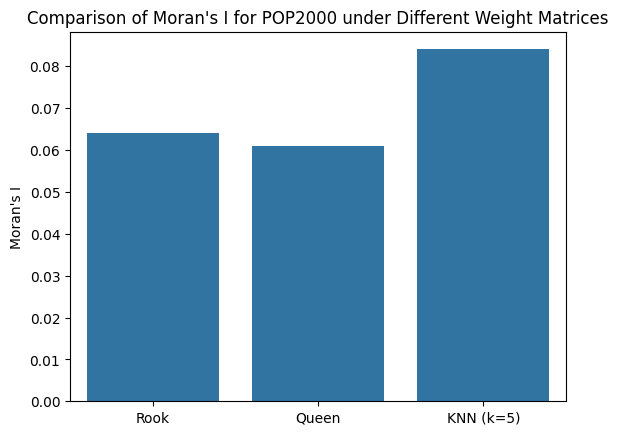

In [ ]:
moran_values = {
    'Rook': m_rook.I,
    'Queen': m_queen.I,
    'KNN (k=5)': m_knn.I
}

sns.barplot(x=list(moran_values.keys()), y=list(moran_values.values()))
plt.title("Comparison of Moran's I for POP2000 under Different Weight Matrices")
plt.ylabel("Moran's I")
plt.show()

# Part 4. Moran's I Evaluation

### 1.   Choosing W as Weight Matrix

### 2.  Moran's I to discuss Auto Correlation of the 3 attributes.

In [ ]:
from esda.moran import Moran_Local

for attr in attributes:
    y = gdf[attr].values
    # Perform Moran's I test
    m_test = Moran(y, w_rook) # using only rook.
    print(f"{attr}: Moran’s I = {m_test.I:.4f}, p-value = {m_test.p_sim:.4f}")

POP2000: Moran’s I = 0.0640, p-value = 0.0860
MED_AGE: Moran’s I = 0.0612, p-value = 0.1240
ASIAN: Moran’s I = 0.0068, p-value = 0.3060


### 3. Monte Carlo Test Spatial Auto Correlation

In [ ]:
for attr in attributes:
    y = gdf[attr].values
    # Perform Monte Carlo with 999 permutations
    m_mc = Moran(y, w_rook, permutations=999)
    print(f"{attr}: Moran’s I = {m_mc.I:.4f}, p-value (Monte Carlo) = {m_mc.p_sim:.4f}")


POP2000: Moran’s I = 0.0640, p-value (Monte Carlo) = 0.0770
MED_AGE: Moran’s I = 0.0612, p-value (Monte Carlo) = 0.1420
ASIAN: Moran’s I = 0.0068, p-value (Monte Carlo) = 0.3280


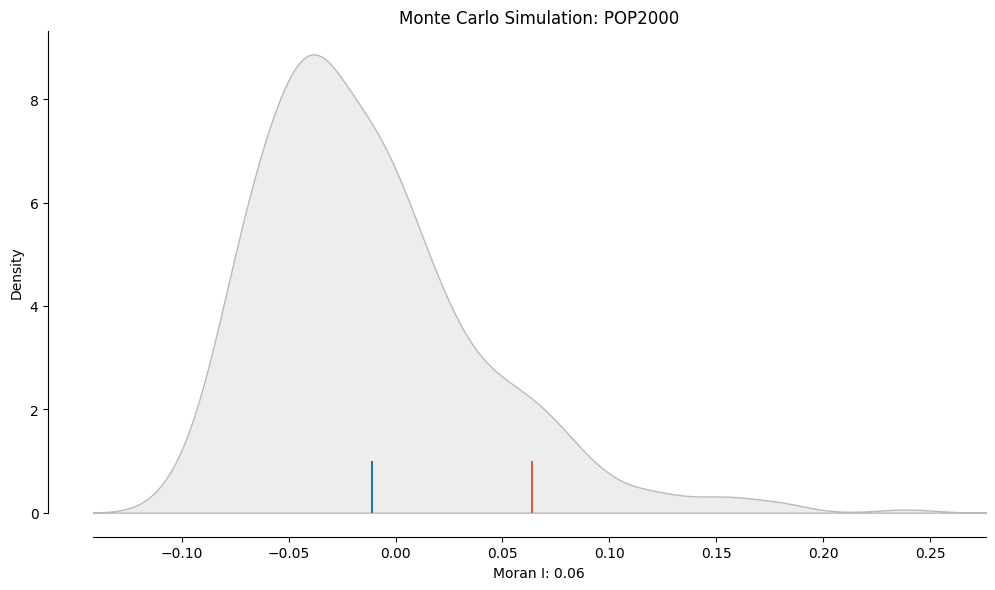

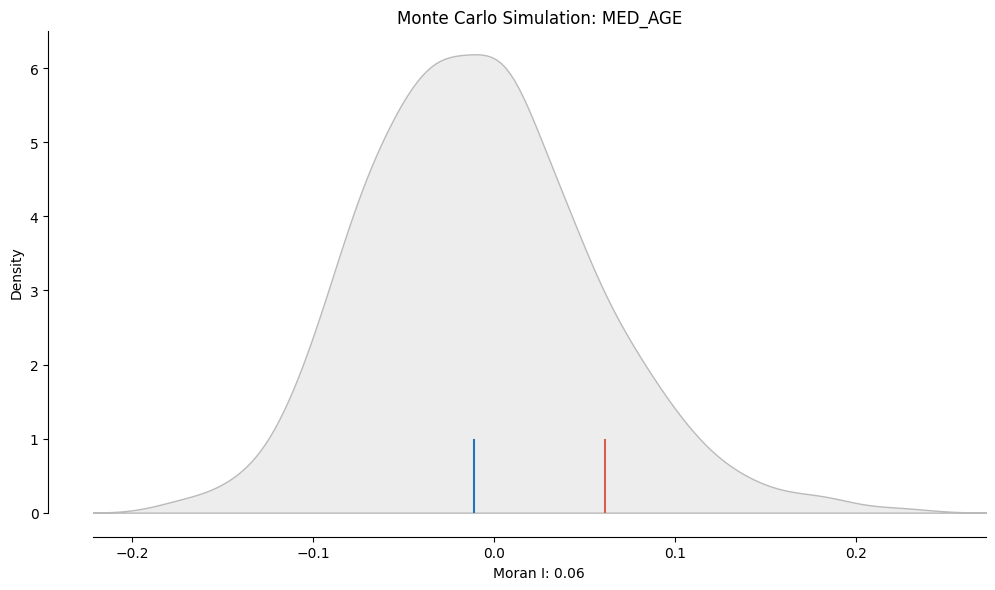

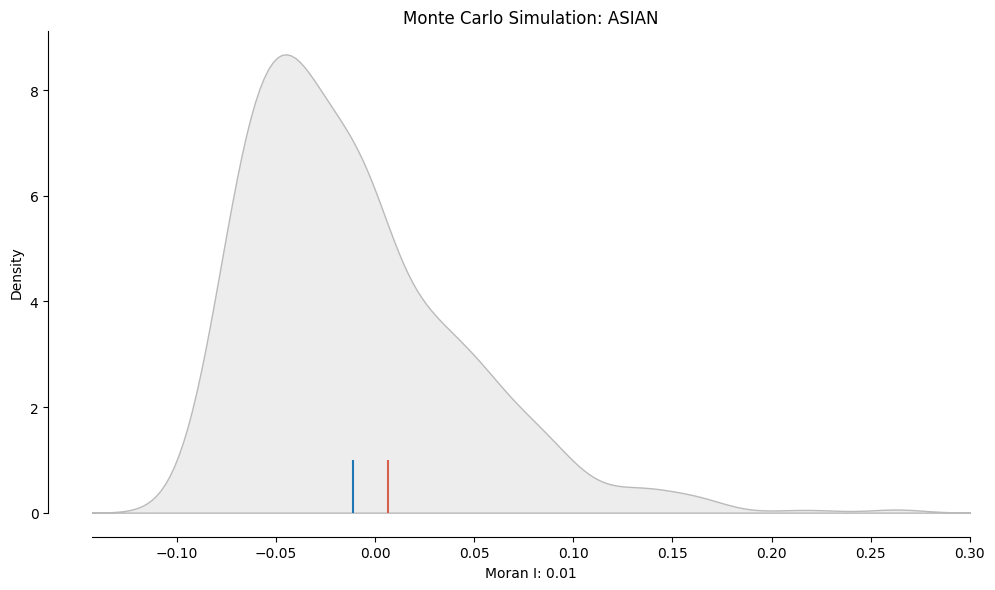

In [ ]:
for attr in attributes:
    y = gdf[attr].values
    # Perform Monte Carlo with 999 permutations
    m_mc = Moran(y, w_rook, permutations=999)

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot to avoid compressing the x-axis
    plot_moran_simulation(m_mc, aspect_equal=False, ax=ax)

    # Manually extend x-limits to ensure the observed Moran's I vertical line is included
    all_values = np.concatenate(([m_mc.I, m_mc.EI], m_mc.sim))
    xmin = min(all_values)
    xmax = max(all_values)
    buffer = (xmax - xmin) * 0.1 if (xmax - xmin) > 0 else 0.01  # Small buffer for padding
    ax.set_xlim(xmin - buffer, xmax + buffer)

    ax.set_title(f"Monte Carlo Simulation: {attr}")
    plt.tight_layout()
    plt.show()

# Part 5.  Local Moran's I Evaluation. Outlier Analysis.

### 1. Thematic Maps of 3 attributes.

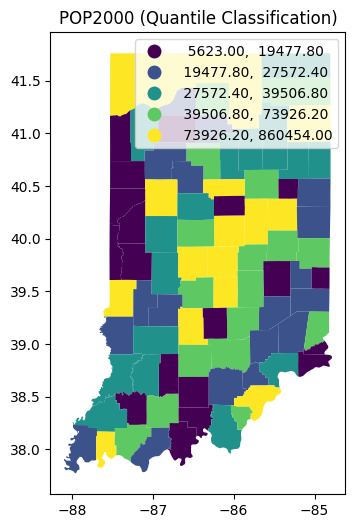

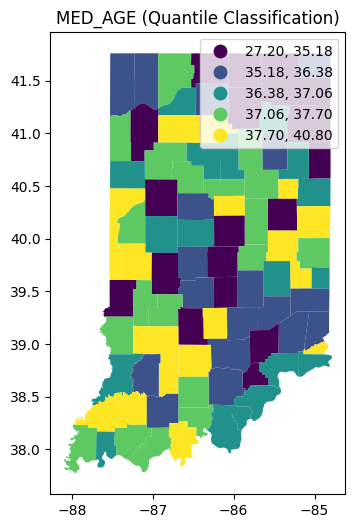

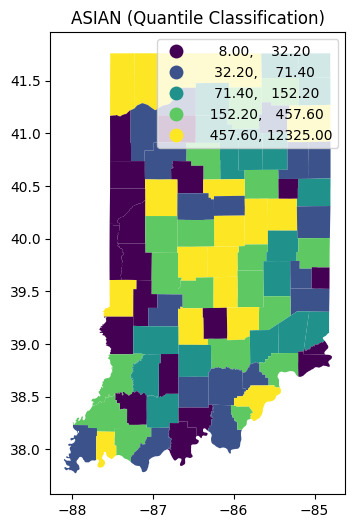

In [ ]:
for attr in attributes:
    gdf.plot(column=attr, scheme='Quantiles', k=5, legend=True, cmap='viridis', figsize=(8,6))
    plt.title(f"{attr} (Quantile Classification)")
    plt.show()

### 2. Applying Moran.plot to plot distribution

In [ ]:
# local Moran's I calculation
for attr in attributes:
    y = gdf[attr].values
    lm = Moran_Local(y, w_rook)
    gdf[f'{attr}_Local_I'] = lm.Is
    gdf[f'{attr}_pval'] = lm.p_sim

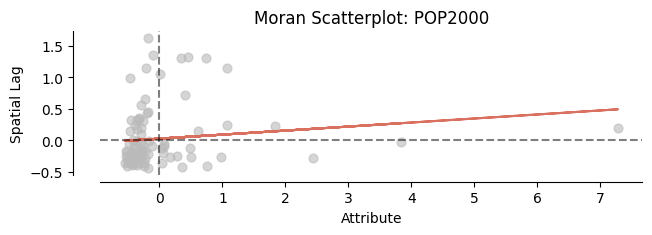

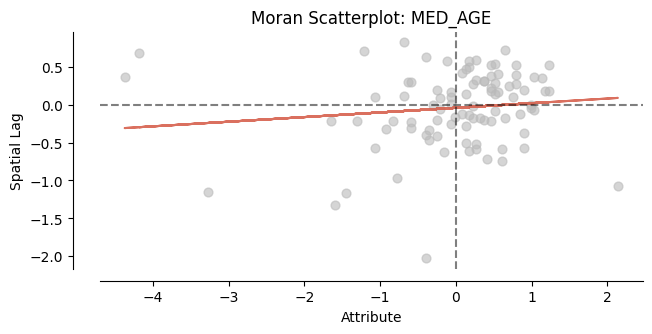

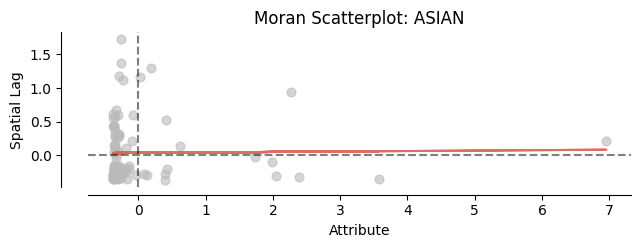

In [ ]:
for attr in attributes:
    y = gdf[attr].values
    m = Moran(y, w_rook) # Use Rook weights as decided earlier
    fig, ax = moran_scatterplot(m)
    ax.set_title(f"Moran Scatterplot: {attr}")
    plt.show()

### 3. Local Moran to visualize

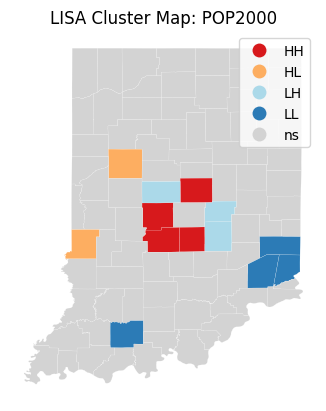

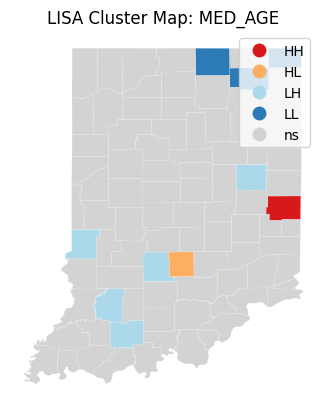

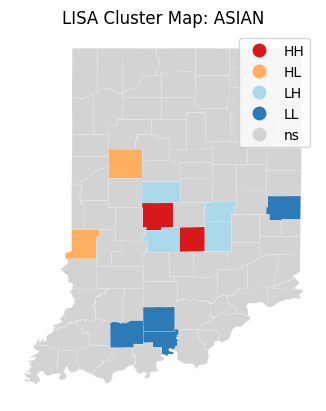

In [ ]:
for attr in attributes:
    y = gdf[attr].values
    lm = Moran_Local(y, w_rook)
    fig, ax = lisa_cluster(lm, gdf, p=0.05)
    ax.set_title(f"LISA Cluster Map: {attr}")
    plt.show()

### 4. Discussion of the Results

#### Discussion of Global and Local Spatial Autocorrelation Results (County Level) with Quantile Thematic Maps

The quantile population map for the year 2000 indicates that Indiana’s population was heavily concentrated in a few urban counties such as Marion (Indianapolis) and surrounding areas, with most other counties exhibiting much lower population levels. The Moran scatterplot for POP2000 shows a weak to moderate positive spatial autocorrelation, suggesting that counties with high populations tend to be near other high-population counties, though this pattern is not strong statewide. The LISA cluster map refines this by highlighting clear High-High (HH) clusters in central Indiana—representing urban centers—and Low-Low (LL) clusters in rural southern counties. This confirms that population distribution is spatially uneven, with localized urban clusters and widespread low-population areas.

In contrast, the median age (MED_AGE) map displays only a few significant local clusters, indicating weak spatial autocorrelation. A single HH cluster in east-central Indiana suggests a pocket of older populations, while LL clusters in the southwest and northwest point to areas with relatively younger residents. The scattered nature of these clusters implies that age distribution is locally variable but not regionally concentrated, reflecting a mix of demographic compositions across the state.

The Asian population (ASIAN) variable exhibits stronger and more distinct spatial clustering. HH clusters appear around central Indiana, likely within or near the Indianapolis metropolitan area, reflecting urban concentration. Meanwhile, LL clusters dominate the southern rural regions, showing areas with consistently low Asian population levels. This spatial pattern indicates a clear urban–rural divide, with minority populations being highly localized in metropolitan hubs.

In short, comparing LISA and Moran's Scatter to Quantile revealed similar patterns in both density of total population, Asian population, and median age.


# Part 6. County Level Analysis

In [ ]:
tracts = gpd.read_file("Census_Tracts_TIGER00_IN.shp")

In [ ]:
# Subset tracts for Marion county (county code '097')
county_code = '097' # Marion County FIPS code
gdf_county = tracts[tracts['COUNTY'] == county_code].copy()

print(f"Tracts in Marion County: {len(gdf_county)}")

Tracts in Marion County: 212


In [ ]:
gdf_county = gdf_county.to_crs(epsg=4326)

<Axes: >

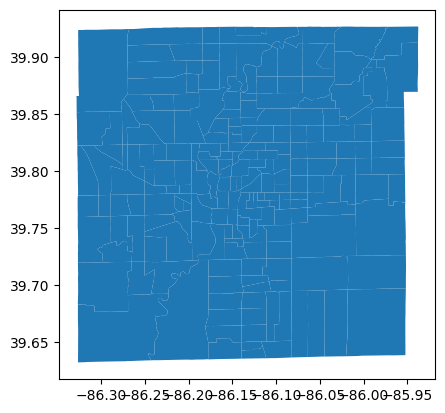

In [ ]:
gdf_county.plot()

In [ ]:
w_county = Queen.from_dataframe(gdf_county)

In [ ]:
print(gdf_county.columns)
selected_attributes = ['POP2000', 'MED_AGE', 'ASIAN']
print(f"Selected attributes for spatial analysis: {selected_attributes}")

Index(['ID', 'FIPSSTCO', 'TRT2000', 'STFID', 'TRACTID', 'COUNTY', 'POP2000',
       'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE',
       'HISPANIC', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_21',
       'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64', 'AGE_65_UP',
       'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ',
       'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD',
       'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT',
       'OWNER_OCC', 'RENTER_OCC', 'geometry'],
      dtype='object')
Selected attributes for spatial analysis: ['POP2000', 'MED_AGE', 'ASIAN']


In [ ]:
for attr in selected_attributes:
    y = gdf_county[attr].values
    m = Moran(y, w_county)
    print(f"{attr}: Moran’s I = {m.I:.4f}, p-value = {m.p_sim:.4f}")

POP2000: Moran’s I = 0.2762, p-value = 0.0010
MED_AGE: Moran’s I = 0.1693, p-value = 0.0010
ASIAN: Moran’s I = 0.5111, p-value = 0.0010


In [ ]:
for attr in selected_attributes:
    y = gdf_county[attr].values
    lm = Moran_Local(y, w_county)
    gdf_county[f'{attr}_Local_I'] = lm.Is
    gdf_county[f'{attr}_pval'] = lm.p_sim

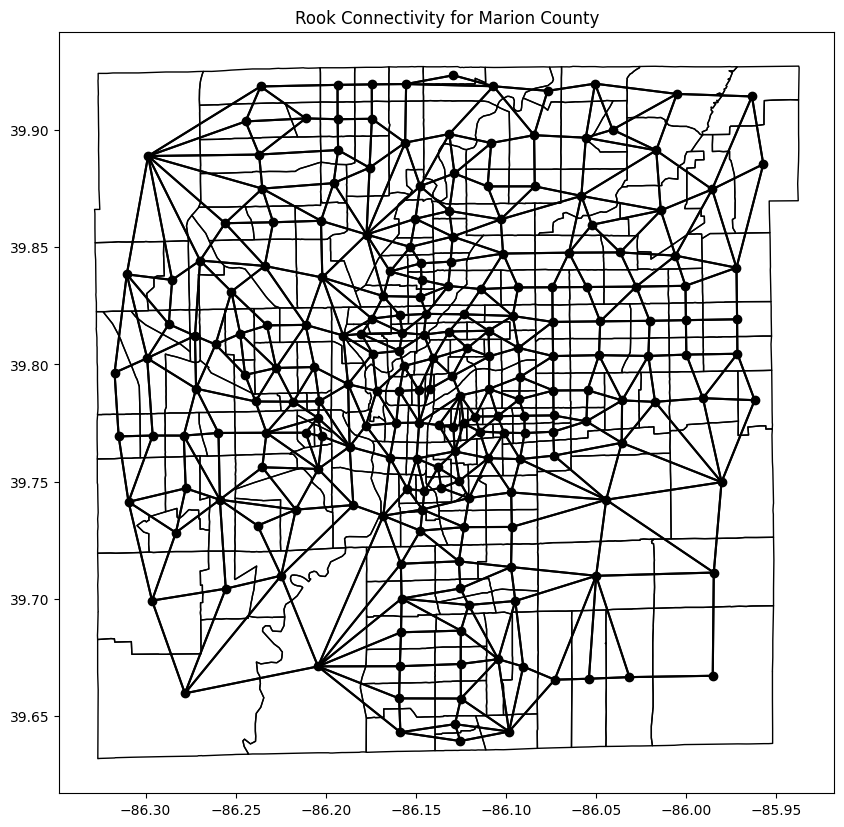

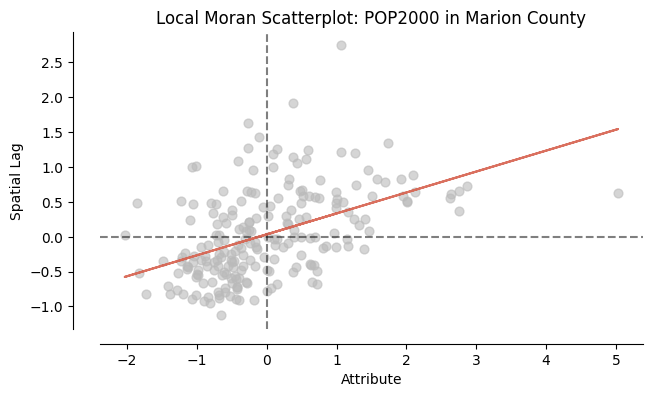

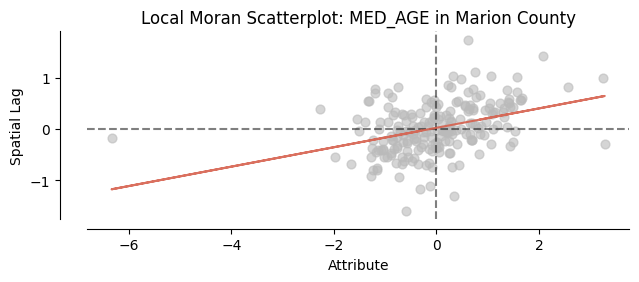

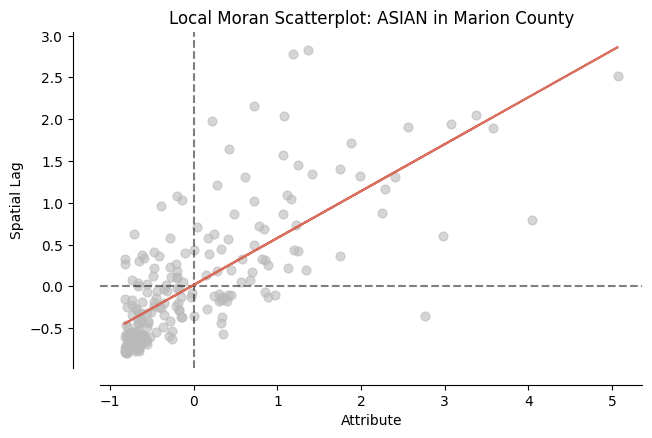

In [ ]:
# Ensure the index of gdf_county is a simple integer index
gdf_county = gdf_county.reset_index(drop=True)

# Plot Rook contiguity connectivity for Marion County
w_county_rook = Rook.from_dataframe(gdf_county)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_county.plot(ax=ax, edgecolor='black', facecolor='none') # Add county shapefile as background
w_county_rook.plot(gdf_county, ax=ax)
ax.set_title('Rook Connectivity for Marion County')
plt.show()

# Local Moran's I scatter plots for selected attributes in Marion County
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local # Import Moran_Local explicitly

for attr in selected_attributes:
    y = gdf_county[attr].values
    lm = Moran_Local(y, w_county_rook) # Use Rook weights for Local Moran's I
    fig, ax = moran_scatterplot(lm)
    ax.set_title(f"Local Moran Scatterplot: {attr} in Marion County")
    plt.show()

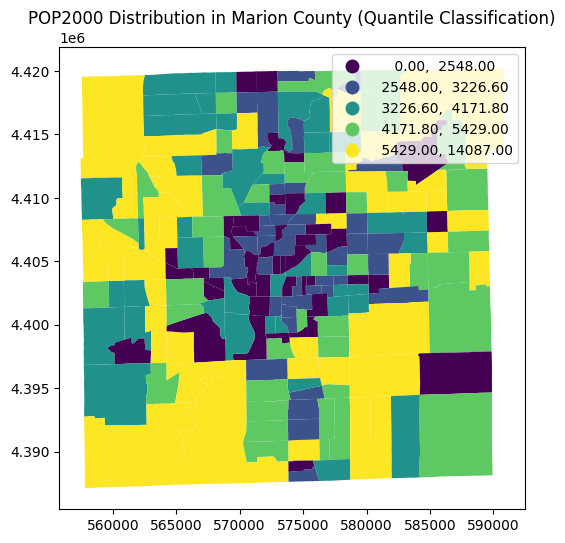

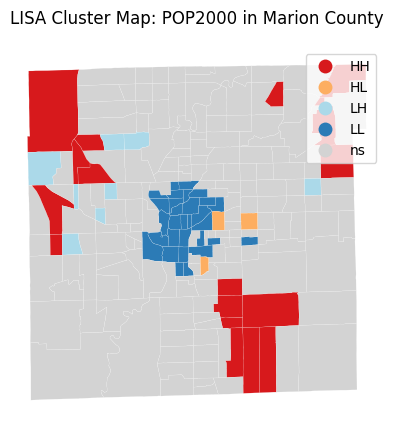

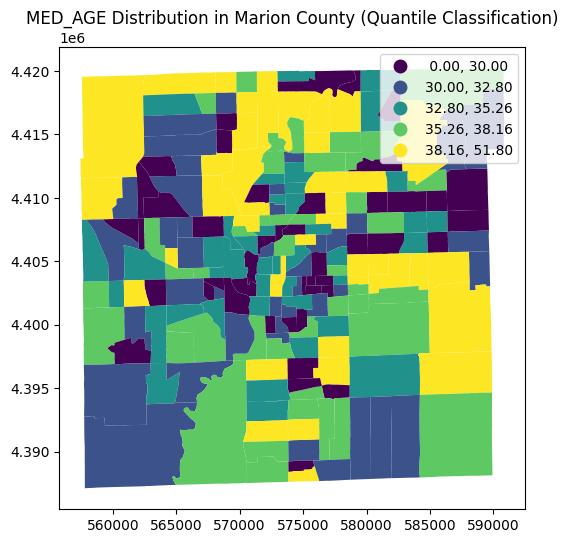

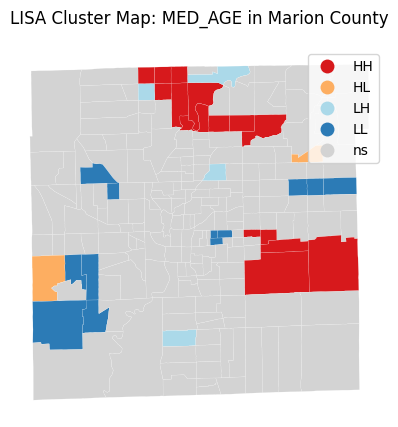

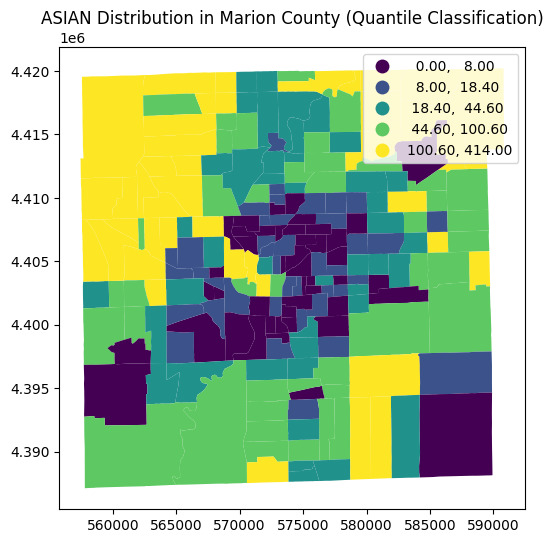

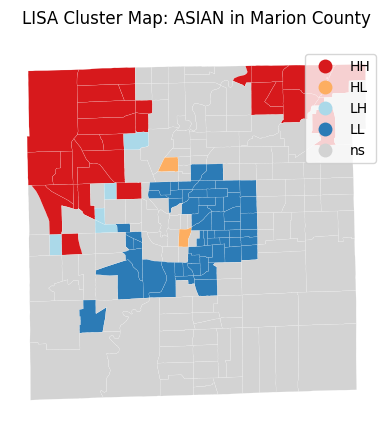

In [ ]:
from splot.esda import lisa_cluster

for attr in selected_attributes:
    # Create thematic map
    gdf_county.plot(column=attr, scheme='Quantiles', k=5, legend=True, cmap='viridis', figsize=(8,6))
    plt.title(f"{attr} Distribution in Marion County (Quantile Classification)")
    plt.show()

    # Calculate Local Moran's I (already done in previous step, but re-calculating here for clarity within this block)
    y = gdf_county[attr].values
    lm = Moran_Local(y, w_county)

    # Create LISA cluster map
    fig, ax = lisa_cluster(lm, gdf_county, p=0.05)
    ax.set_title(f"LISA Cluster Map: {attr} in Marion County")
    plt.show()

### Data Analysis Key Findings

*   Global Moran's I for 'MED\_AGE' (0.2762) and 'POP2000' (0.2762) show statistically slight positive spatial autocorrelation (p-values of 0.0010 and 0.0010 respectively), indicating that tracts with similar median ages and total populations tend to cluster together in Tippecanoe County.
*   Global Moran's I for 'Asians' (0.5111) is significantly positively significant (p-value of 0.0010), suggesting high spatial autocorrelation for the Asian population in 2000.
*   Local Moran's I calculations identified specific spatial clusters (High-High, Low-Low, High-Low, Low-High) for the selected attributes within Marion County, as visualized by the LISA cluster maps.
